# <i>Assignment 1</i> 

Problem 2

This second portion is about training a  logestic regression to predic breast canser data submitted by [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). In this example logestic regression model is created using pytorch library. 

In [2]:
#<libraries>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler 

import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

Load data

In [3]:
from sklearn.datasets import load_breast_cancer

# lading data
data = load_breast_cancer()

# Data information
print(list(data.target_names))
print(np.array(data.data).shape)
print(np.array(data.target).shape)

['malignant', 'benign']
(569, 30)
(569,)


In [4]:
# Visualize data 1
data_b = pd.DataFrame(data.data)
data_b.head

<bound method NDFrame.head of         0      1       2       3   ...      26      27      28       29
0    17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1    20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2    19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3    11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4    20.29  14.34  135.10  1297.0  ...  0.4000  0.1625  0.2364  0.07678
..     ...    ...     ...     ...  ...     ...     ...     ...      ...
564  21.56  22.39  142.00  1479.0  ...  0.4107  0.2216  0.2060  0.07115
565  20.13  28.25  131.20  1261.0  ...  0.3215  0.1628  0.2572  0.06637
566  16.60  28.08  108.30   858.1  ...  0.3403  0.1418  0.2218  0.07820
567  20.60  29.33  140.10  1265.0  ...  0.9387  0.2650  0.4087  0.12400
568   7.76  24.54   47.92   181.0  ...  0.0000  0.0000  0.2871  0.07039

[569 rows x 30 columns]>

In [5]:
# Visualize data 2
colomns_customize = columns=np.append(data.feature_names,["target"])
colomns_customize

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='<U23')

In [6]:
# Visualize data 3 
colomns_customize = columns=np.append(data.feature_names,["target"])
columns=colomns_customize
df_cancer = pd.DataFrame(data.data, data.target) 
df_cancer

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Process data

In [7]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3 , random_state=5)

# setting the scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform train and test data according to the scaler 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert to float
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# display infromation 
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (398, 30)
X_test shape (171, 30)
y_train shape (398,)
y_test shape (171,)


In [8]:
# Create pytorch tensors inputs
X_train_input = Variable(torch.from_numpy(X_train))
X_test_input = Variable(torch.from_numpy(X_test))

# rearrange for one dimention
y_train = torch.tensor(y_train, dtype=torch.float).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float).view(-1, 1)

# Display torch tensors
print("X_train_input",X_train_input.shape)
print("X_test_input",X_test_input.shape)

print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train_input torch.Size([398, 30])
X_test_input torch.Size([171, 30])
y_train shape torch.Size([398, 1])
y_test shape torch.Size([171, 1])


Design Model

In [19]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs



In [40]:
# initiate model
input_dim = 30
output_dim = 1
model = LogisticRegression(input_dim, output_dim)

# Store information for each epoch 
loss_arr    = [] 
val_arr     = []
accuracy_train_arr = []
accuracy_test_arr = []
epoch_arr   = []

# Training parameters 
num_epochs = 2000
learningRate = 0.001
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(num_epochs):

    # zero grad before new step
    optimizer.zero_grad()

    # Forward pass and loss
    y_pred = model(X_train_input)
    #print(y_pred)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    
    optimizer.step()

    # Validate model
    model.eval() # Put the model into evaluation mode

    with torch.no_grad():

      # Test accuracy 
      y_train_predicted_cls = y_pred.round()
      acc_train = y_train_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])

      # Validation loss 
      val_pred = model(X_test_input)
      val_loss = criterion(val_pred, y_test) # Calculate validation loss

      # Validation accuracy
      y_test_predicted_cls = val_pred.round()
      acc_test = y_test_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])


      # store values in an array

      # Keep track of epochs
      epoch_arr.append(epoch+1)

      loss_arr.append(loss.item())
      val_arr.append(val_loss.item())
      accuracy_train_arr.append(acc_train.item())
      accuracy_test_arr.append(acc_test.item())

      print(f"Epoch: {epoch} learning rate: {learningRate} Training Loss: {loss.item()} Validation Loss: {val_loss.item()}  accuracy_train: {acc_train.item():.4f} accuracy_test: {acc_test.item():.4f} ")
      #print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



Epoch: 0 learning rate: 0.001 Training Loss: 0.6705641746520996 Validation Loss: 0.6723986864089966  accuracy_train: 0.7261 accuracy_test: 0.6608 
Epoch: 1 learning rate: 0.001 Training Loss: 0.6705343723297119 Validation Loss: 0.6723647117614746  accuracy_train: 0.7261 accuracy_test: 0.6608 
Epoch: 2 learning rate: 0.001 Training Loss: 0.670504629611969 Validation Loss: 0.6723305583000183  accuracy_train: 0.7261 accuracy_test: 0.6608 
Epoch: 3 learning rate: 0.001 Training Loss: 0.6704751253128052 Validation Loss: 0.6722966432571411  accuracy_train: 0.7261 accuracy_test: 0.6608 
Epoch: 4 learning rate: 0.001 Training Loss: 0.6704452037811279 Validation Loss: 0.6722626090049744  accuracy_train: 0.7261 accuracy_test: 0.6608 
Epoch: 5 learning rate: 0.001 Training Loss: 0.6704155206680298 Validation Loss: 0.6722286939620972  accuracy_train: 0.7286 accuracy_test: 0.6608 
Epoch: 6 learning rate: 0.001 Training Loss: 0.6703858375549316 Validation Loss: 0.6721946001052856  accuracy_train: 0.

<Figure size 432x288 with 0 Axes>

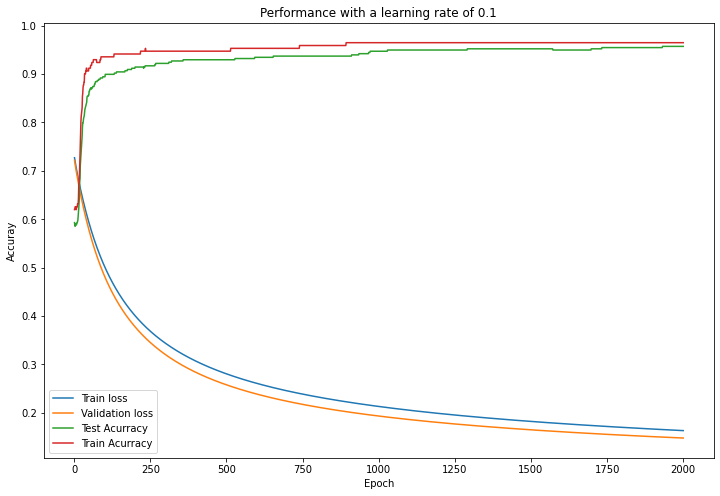

In [27]:
#learning 0.01
plt.figure()
plt.figure(figsize=(12,8))
plt.title('Performance with a learning rate of {}'.format(learningRate))
plt.plot(epoch_arr,loss_arr,label='Train loss')
plt.plot(epoch_arr,val_arr,label='Validation loss')
plt.plot(epoch_arr,accuracy_train_arr,label='Test Acurracy')
plt.plot(epoch_arr,accuracy_test_arr,label='Train Acurracy')
plt.xlabel('Epoch')
plt.ylabel('Accuray')
plt.legend()
plt.show()

In [ ]:
#learning 0.1
display_data_plot()

<Figure size 432x288 with 0 Axes>

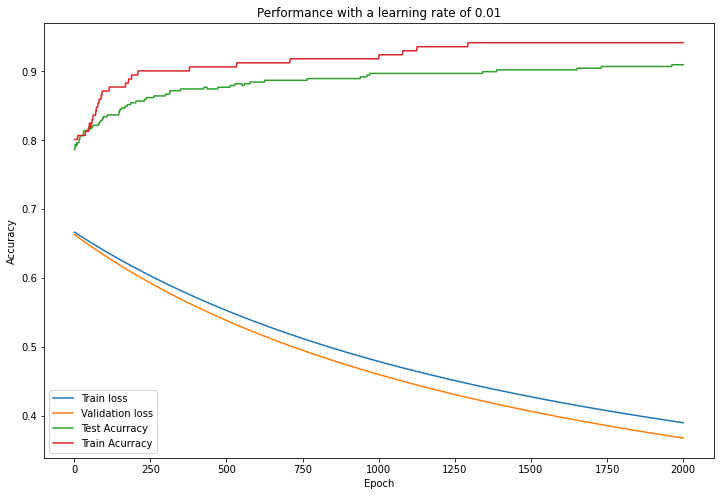

In [38]:
#learning 0.01
plt.figure()
plt.figure(figsize=(12,8))
plt.title('Performance with a learning rate of {}'.format(learningRate))
plt.plot(epoch_arr,loss_arr,label='Train loss')
plt.plot(epoch_arr,val_arr,label='Validation loss')
plt.plot(epoch_arr,accuracy_train_arr,label='Test Acurracy')
plt.plot(epoch_arr,accuracy_test_arr,label='Train Acurracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

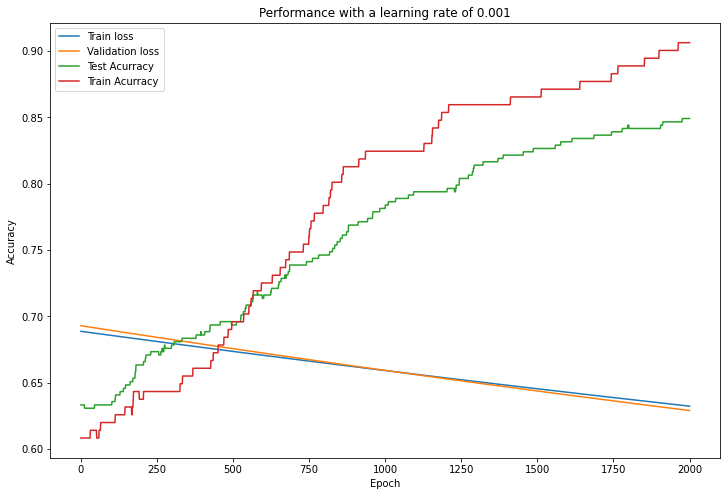

In [29]:
#learning 0.001
plt.figure()
plt.figure(figsize=(12,8))
plt.title('Performance with a learning rate of {}'.format(learningRate))
plt.plot(epoch_arr,loss_arr,label='Train loss')
plt.plot(epoch_arr,val_arr,label='Validation loss')
plt.plot(epoch_arr,accuracy_train_arr,label='Test Acurracy')
plt.plot(epoch_arr,accuracy_test_arr,label='Train Acurracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Results

Epoch: 1999 learning rate: 0.001 Training Loss: 0.6167241930961609 Validation Loss: 0.6115201711654663  accuracy_train: 0.8668 accuracy_test: 0.9006 

Epoch: 1999 learning rate: 0.01 Training Loss: 0.39713969826698303 Validation Loss: 0.37617188692092896  accuracy_train: 0.9146 accuracy_test: 0.9415

Epoch: 1999 learning rate: 0.1 Training Loss: 0.16359683871269226 Validation Loss: 0.1477421224117279  accuracy_train: 0.9573 accuracy_test: 0.9649 

Iterations needed for covergence of accuracy  
* 0.001 - Never converges
* 0.01  - 1250 epochs
* 0.1   - 300 epochs

# Discussion 

According to the training information the best and lowest validation loss was given by the learning rate of 0.1. Learning rates of 0.1 and 0.01 did converged , while 0.001 failed to achieve
convergence. In epoch trained , Train accuracy was higher than the test accuracy. model with learning rate of 0.1 has a steady increaments in accuracy and steady decrements which have the
ability pedict smothly through out the training. 
